In [42]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
import pandas as pd
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from PIL import Image, ImageSequence

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
_pix = m.Pix.objects.order_by('-id')[1104]

In [50]:
_pix.__dict__

{'_state': <django.db.models.base.ModelState at 0x12436da30>,
 'id': 3313,
 'owner_id': 434,
 'src': 'post/2021/3/22/magrittelim@gmail.com/2021-03-22_182954.288462__blob',
 'desc': '저스틴비버 justinbieber | 스트리트 스냅',
 'tokens': 'footwear shoe leg street_fashion sleeve gesture sneakers fashion_design recreation waist denim blazer eyewear sportswear thigh bag knee t-shirt road electric_blue luggage_and_bags leisure event human_leg boot uniform fun pedestrian walking white-collar_worker street belt 신발류 구두 다리 스트리트패션 소매 몸짓 운동화 패션디자인 휴양 허리 청 블레이저 안경 운동복 대퇴골 가방 무릎 티셔츠 도로 강청색 수하물및가방 여가 행사 인간의다리 신병 제복 장난 보행자 보행 사무직노동자 거리 벨트 스니커즈 저스틴비버 justinbieber 스트리트 스냅',
 'tokens_ko': '신발 구두 바지 스트리트 티셔츠 운동화 바캉스룩 데님 블레이저 안경 스포츠웨어 가방 티셔츠 스트리트웨어 찐청색 여행가방 바지 부츠 반듯한 조깅 오피스룩 스트리트웨어 벨트 스니커즈 저스틴비버 스트리트 스냅',
 'outlink': 'https://www.instagram.com/justinbieber/',
 'created_at': datetime.datetime(2021, 3, 24, 1, 38, 11, 576620),
 'type': 'X',
 'taggerlog': {'data': {'objects': [{'tags': [{'fit': {'id': 'T0479',
        'na

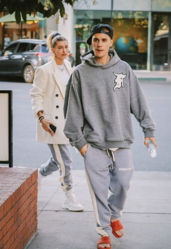

In [51]:
img = Image.open(_pix.src)
img.resize((int(img.width / 2), int(img.height / 2)))

In [33]:
endpoint = 'https://api.omnious.com/tagger/v2.12/tags'
headers = { 
    'x-api-key': 'z75BOQL2oFIepdufKGm8kqYtNnybCVHUZag3XPi6',
    'accept-language': 'ko'
}
json = {
    "image": {
        "type": "url",
        "content": _pix.src.url
    },
    "context": {
        "id": _pix.id,
        "detection": [
            "TOP",
            "BOTTOM",
            "WHOLEBODY",
            "SWIMWEAR",
            "SHOES",
            "BAG",
            "HAT",
            "JEWELRY",
            "ACCESSORY"
        ],
#         "gender": "남",
#         "brand": "NIKE",
#         "currency": "KRW",
#         "price": 30000,
#         "age": "20대초",
#         "keywords": "블링블링, 테스트",
#         "productContentName": "원피스",
#         "season": "19SS"
    }
}

In [26]:
json

{'image': {'type': 'url',
  'content': 'https://storage.googleapis.com/sideb-proejct.appspot.com/post/2021/3/12/magrittelim%40gmail.com/2021-03-12_115406.874423__blob?Expires=1634008728&GoogleAccessId=sideb-serviceaccount%40sideb-proejct.iam.gserviceaccount.com&Signature=Og2leANQAYslvF1mwneyAYnFF2kVZ10Pf85O0Db8ftUcx%2Fwbba%2BrXFVfnOeKOVOKpcvmGlKrFfmA1ePJidfjHOx91%2FlgLjaK5jZw1kOuLwIkYlZJ1QZquUf92bDiElAArsBrkePwYlvPAchZz7UI32rkBjFn0z8vu%2Bu3nrENaGR7sht7VbeyxfX1huryXeW9i7K9a1T4aivFBage%2F1kPv5iyffkvfhU3e6x4%2BELiSAd89mT0Guo5ulJlKvt8osFD14xRmmDSolRLPO1508sCt5V%2Br7prv1GQXuDOgmeS6eJTilsMg0pLfLSPhoFXO8RiBKY1HbF9KdjyxLnsu888Rw%3D%3D'},
 'context': {'id': 119,
  'detection': ['TOP',
   'BOTTOM',
   'WHOLEBODY',
   'SWIMWEAR',
   'SHOES',
   'BAG',
   'HAT',
   'JEWELRY',
   'ACCESSORY']}}

In [27]:
res = requests.post(endpoint, json=json, headers=headers)

In [28]:
res

<Response [201]>

In [29]:
output = res.json(); output

{'data': {'imageInfo': [],
  'genderInfo': {'id': 'T0574', 'name': '여성'},
  'objects': [{'type': 'CLOTHING',
    'tags': [{'category': {'id': 'T0360', 'name': '재킷'},
      'position': {'x': 0.47507507, 'y': 0.39208984},
      'item': {'id': 'T0030', 'name': '테일러드재킷', 'confidence': 0.63720155},
      'colors': [{'id': 'T0324', 'name': '블랙', 'confidence': 0.988252},
       {'id': 'T0333', 'name': '네이비', 'confidence': 0.011392606},
       {'id': 'T0325', 'name': '화이트', 'confidence': 0.0001590588}],
      'length': {'id': 'T0474', 'name': '노멀', 'confidence': 0.7129196},
      'sleeveLength': {'id': 'T0082', 'name': '긴팔', 'confidence': 0.9938992},
      'neckLine': {'id': 'T0304', 'name': '테일러드카라', 'confidence': 0.99750274},
      'fit': {'id': 'T0477', 'name': '노멀', 'confidence': 0.75789034},
      'shape': None,
      'colorDetail': [{'code': '#26262a',
        'name': 'black-beauty',
        'pixelFraction': 0.9887856},
       {'code': '#5c5d5b', 'name': 'gunmetal', 'pixelFraction': 0.01

In [34]:
output['data']['objects'][0]

{'type': 'CLOTHING',
 'tags': [{'category': {'id': 'T0359', 'name': '점퍼'},
   'position': {'x': 0.6990138, 'y': 0.56347656},
   'item': {'id': 'T0349', 'name': '야상', 'confidence': 0.80409425},
   'colors': [{'id': 'T0339', 'name': '카키', 'confidence': 0.98025846},
    {'id': 'T0330', 'name': '그레이', 'confidence': 0.015564387},
    {'id': 'T0326', 'name': '베이지', 'confidence': 0.0026355572}],
   'length': {'id': 'T0470', 'name': '롱', 'confidence': 0.7120738},
   'sleeveLength': {'id': 'T0082', 'name': '긴팔', 'confidence': 0.98473096},
   'neckLine': {'id': 'T0342', 'name': '후드', 'confidence': 0.90565443},
   'fit': {'id': 'T0479', 'name': '오버사이즈', 'confidence': 0.59441227},
   'shape': None,
   'colorDetail': [{'code': '#5f5b4c',
     'name': 'kalamata',
     'pixelFraction': 0.7136852},
    {'code': '#141414', 'name': 'real-black7', 'pixelFraction': 0.10400125},
    {'code': '#d1d5d0', 'name': 'foggy-dew', 'pixelFraction': 0.09388136},
    {'code': '#54392d', 'name': 'potting-soil', 'pixel

In [30]:
_pix.taggerlog = output
_pix.save()

In [31]:
def get_value(tag, what):
    try:
        return tag[what]['name']
    except:
        try:
            return tag[what][0]['name']
        except:
            return None

In [32]:
_output = _pix.taggerlog

for _obj in _output['data']['objects']:
    for _tag in _obj['tags']:
        t = m.Tag(
            pix=_pix,
            type=_obj['type'].lower(),
            category=_tag['category']['name'],
            item=_tag['item']['name']
        )
        
        t.x = _tag['position']['x']
        t.y = _tag['position']['y']
        t.color = get_value(_tag, 'colors')
        t.detail = get_value(_tag, 'details')
        t.pattern = get_value(_tag, 'prints')
        t.texture = get_value(_tag, 'textures')
        t.look = get_value(_tag, 'looks')
        t.length = get_value(_tag, 'length')
        t.sleeve_length = get_value(_tag, 'sleeveLength')
        t.neckline = get_value(_tag, 'neckLine')
        t.fit = get_value(_tag, 'fit')
        t.shape = get_value(_tag, 'shape')
        
        t.heel_height = get_value(_tag, 'heelHeight')
        t.heel_shape = get_value(_tag, 'heelShape')
        t.toe_type = get_value(_tag, 'toeType')
        t.sole_type = get_value(_tag, 'soleType')

        t.strap = get_value(_tag, 'strap') == '스트랩있음'
        t.size = get_value(_tag, 'size')
        t.main_material = get_value(_tag, 'mainMaterials')
        t.sub_material = get_value(_tag, 'subMaterials')

        t.save()